In [1]:
import sys
sys.path.append("..")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from utils.pct import PCT
from utils.pca import PCA
from datasets import load_dataset
from utils.plotting import scatter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
iris_data, iris_features = load_dataset.iris()

In [4]:
iris_data["class"].unique()
print(iris_data)

     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [11]:
# build a Decision Tree for training subset and test it on test subset
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x = iris_features
y = iris_data["class"]
# convert the class labels to numbers
y = y.replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)

y_pred = tree_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

Text(0, 0.5, 'No datapoints')

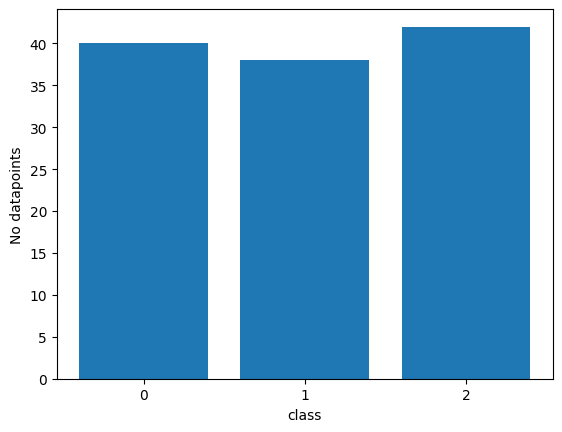

In [40]:
plt.bar([2, 0, 1], y_train.value_counts() )
plt.xticks([0, 1, 2])
plt.xlabel("class")
plt.ylabel("No datapoints")

Text(0, 0.5, 'No datapoints')

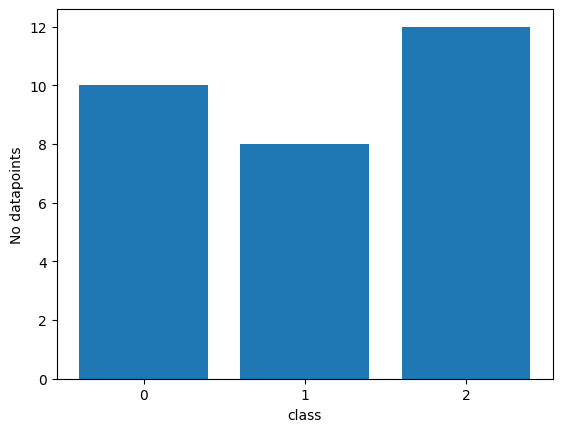

In [41]:
plt.bar([2, 0, 1], y_test.value_counts())
plt.xticks([0, 1, 2])
plt.xlabel("class")
plt.ylabel("No datapoints")

In [43]:
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=tree_clf.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.9666666666666667


In [44]:
1 - 0.9666666666666667

0.033333333333333326

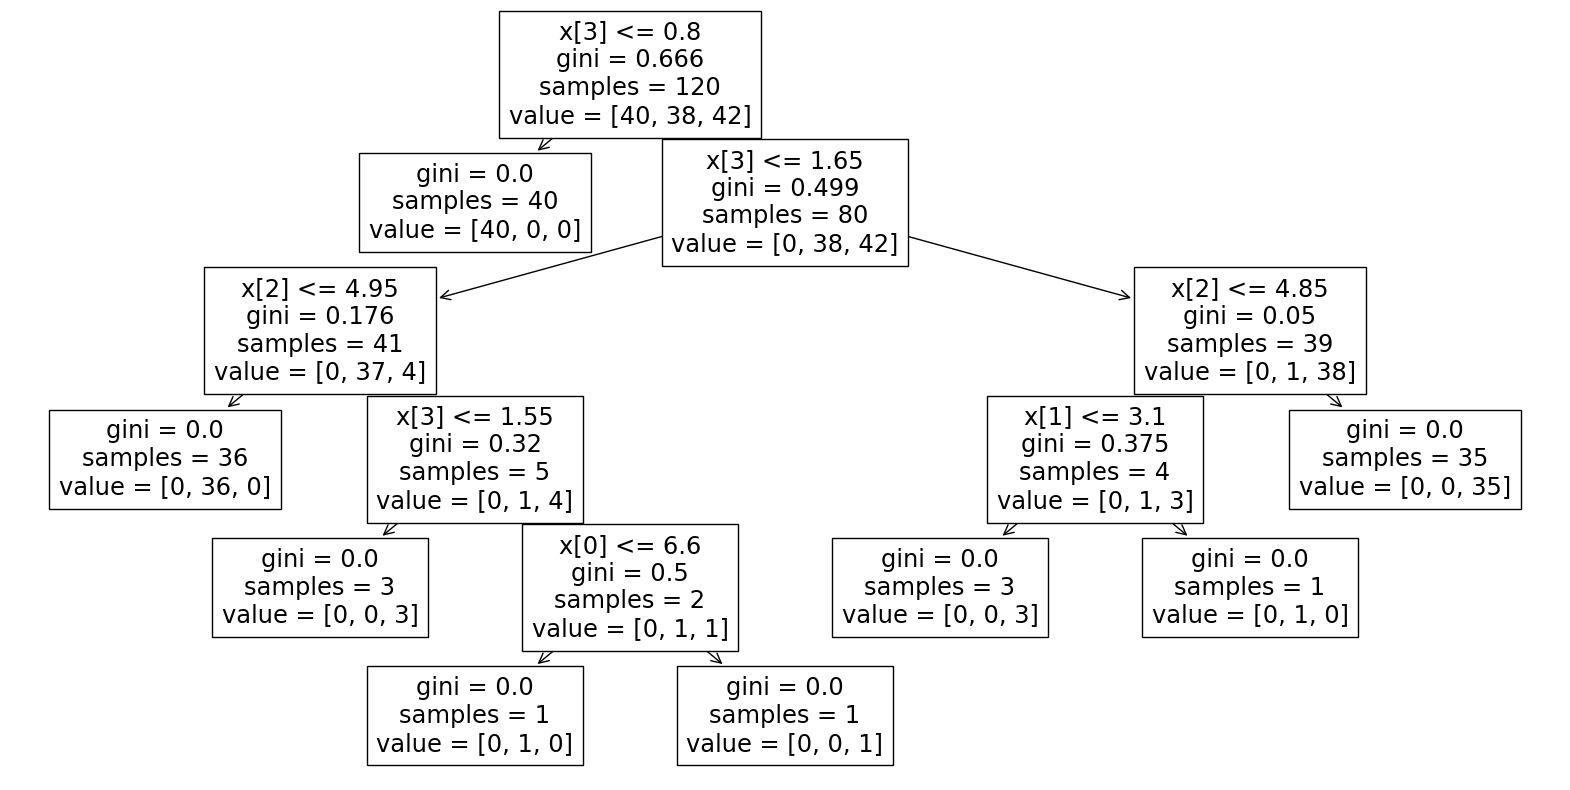

In [45]:
# plot the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_clf)
plt.show()


[[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]


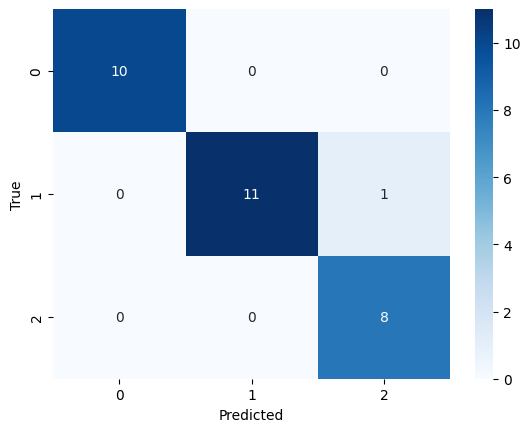

In [46]:
# draw the table of the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(conf_mat)

# draw the confusion matrix
sns.heatmap(conf_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
